# eager execution

following along with [this](https://www.tensorflow.org/programmers_guide/eager)

In [1]:
import numpy as np
import tensorflow as tf

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## basics

In [2]:
tf.enable_eager_execution()

In [3]:
tf.executing_eagerly()

True

In [4]:
x = [[2.]]
m = tf.matmul(x, x)

In [5]:
m

<tf.Tensor: id=2, shape=(1, 1), dtype=float32, numpy=array([[4.]], dtype=float32)>

In [6]:
print('m = {}'.format(m))

m = [[4.]]


In [7]:
a = tf.constant([
    [1, 2],
    [3, 4]
])
a

<tf.Tensor: id=5, shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [8]:
b = tf.add(a, 1)
b

<tf.Tensor: id=8, shape=(2, 2), dtype=int32, numpy=
array([[2, 3],
       [4, 5]], dtype=int32)>

In [9]:
a * b

<tf.Tensor: id=10, shape=(2, 2), dtype=int32, numpy=
array([[ 2,  6],
       [12, 20]], dtype=int32)>

In [10]:
c = np.multiply(a, b)
c

array([[ 2,  6],
       [12, 20]], dtype=int32)

In [11]:
a.numpy()

array([[1, 2],
       [3, 4]], dtype=int32)

In [12]:
tfe = tf.contrib.eager

## control flow

In [13]:
def fizzbuzz(max_num):
    counter = tf.constant(0)
    for num in range(max_num):
        num = tf.constant(num)
        if int(num % 3) == 0 and int(num % 5) == 0:
            print('FizzBuzz')
        elif int(num % 3) == 0:
            print('Fizz')
        elif int(num % 5) == 0:
            print('Buzz')
        else:
            print(num)
        counter += 1
    return counter

In [14]:
fizzbuzz(27)

FizzBuzz
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
Fizz
tf.Tensor(4, shape=(), dtype=int32)
Buzz
Fizz
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
Fizz
Buzz
tf.Tensor(11, shape=(), dtype=int32)
Fizz
tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
FizzBuzz
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(17, shape=(), dtype=int32)
Fizz
tf.Tensor(19, shape=(), dtype=int32)
Buzz
Fizz
tf.Tensor(22, shape=(), dtype=int32)
tf.Tensor(23, shape=(), dtype=int32)
Fizz
Buzz
tf.Tensor(26, shape=(), dtype=int32)


<tf.Tensor: id=242, shape=(), dtype=int32, numpy=27>

## building models

### custom layers

In [15]:
class MySimpleLayer(tf.keras.layers.Layer):
    def __init__(self, output_units):
        self.output_units = output_units
        
    def build(self, input):
        self.kernel = self.add_variable(
            "kernel",
            [input.shape[-1], self.output_units]
        )
    
    def call(self, input):
        return tf.matmul(input, self.kernel)

what methods did we just define?

In [16]:
tf.keras.layers.Layer.build?

In [17]:
tf.keras.layers.Layer.call?

### regular-ass layers

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(784,)),
    tf.keras.layers.Dense(10),
])

### complicated-ass models

you can inherit in `keras` and it is dopetown

In [19]:
class MNISTModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.dense1 = tf.keras.layers.Dense(units=10)
        self.dense2 = tf.keras.layers.Dense(units=10)
    
    def call(self, input):
        result = self.dense1(input)
        result = self.dense2(result)
        result = self.dense2(result)  # <-- note: reusing dense2 layer
        return result

model = MNISTModel()

## eager training

### gradients

we need to be able to calculate and record gradients. `tensorflow` does this with a `GradientTape` object, which will record the gradient of a given function at every input value for which that function is invoked.

it is unclear if this is for eager execution *only*

In [20]:
w = tfe.Variable([[1.0]])
w

<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[1.]], dtype=float32)>

In [21]:
.5 * w

<tf.Tensor: id=304, shape=(1, 1), dtype=float32, numpy=array([[0.5]], dtype=float32)>

In [22]:
with tf.GradientTape() as tape:
    loss = w * w
loss

<tf.Tensor: id=308, shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

In [23]:
grad = tape.gradient(loss, [w])
grad

[<tf.Tensor: id=315, shape=(1, 1), dtype=float32, numpy=array([[2.]], dtype=float32)>]

In [28]:
gradlist = []
for i in range(10):
    w = tfe.Variable([[float(i)]])
    with tf.GradientTape() as tape:
        loss = w * w
    gradlist.append(tape.gradient(loss, [w]))
gradlist

[[<tf.Tensor: id=1508, shape=(1, 1), dtype=float32, numpy=array([[0.]], dtype=float32)>],
 [<tf.Tensor: id=1524, shape=(1, 1), dtype=float32, numpy=array([[2.]], dtype=float32)>],
 [<tf.Tensor: id=1540, shape=(1, 1), dtype=float32, numpy=array([[4.]], dtype=float32)>],
 [<tf.Tensor: id=1556, shape=(1, 1), dtype=float32, numpy=array([[6.]], dtype=float32)>],
 [<tf.Tensor: id=1572, shape=(1, 1), dtype=float32, numpy=array([[8.]], dtype=float32)>],
 [<tf.Tensor: id=1588, shape=(1, 1), dtype=float32, numpy=array([[10.]], dtype=float32)>],
 [<tf.Tensor: id=1604, shape=(1, 1), dtype=float32, numpy=array([[12.]], dtype=float32)>],
 [<tf.Tensor: id=1620, shape=(1, 1), dtype=float32, numpy=array([[14.]], dtype=float32)>],
 [<tf.Tensor: id=1636, shape=(1, 1), dtype=float32, numpy=array([[16.]], dtype=float32)>],
 [<tf.Tensor: id=1652, shape=(1, 1), dtype=float32, numpy=array([[18.]], dtype=float32)>]]

### training models

#### example: shitty linear regression model with forward pass

In [29]:
NUM_EXAMPLES = 1000
training_inputs = tf.random_normal([NUM_EXAMPLES])
noise = tf.random_normal([NUM_EXAMPLES])
training_outputs = 3 * training_inputs + 2 + noise
training_outputs

<tf.Tensor: id=1677, shape=(1000,), dtype=float32, numpy=
array([ 3.64652181e+00,  2.28102183e+00, -2.40652740e-01,  3.93023729e+00,
        2.82786632e+00,  3.77242160e+00,  6.17322731e+00,  1.05803132e+00,
        2.54766512e+00, -4.88282442e-01, -2.82695341e+00,  4.84145021e+00,
       -1.68067813e+00,  1.20960021e+00,  6.70853138e+00,  6.31164670e-01,
        3.07569718e+00,  1.79241931e+00,  2.23191571e+00,  2.32926559e+00,
       -1.41559982e+00,  1.71928775e+00, -4.35607255e-01,  9.14053261e-01,
        7.63299131e+00,  4.09155273e+00,  1.77412331e-01,  6.06801510e-01,
        1.69252872e+00,  5.88237476e+00, -3.33578658e+00,  5.50017452e+00,
        2.91740918e+00,  6.32875156e+00, -2.64434004e+00,  4.28190756e+00,
        6.39332008e+00,  1.20916581e+00,  5.51986408e+00,  2.63368702e+00,
        6.49455738e+00,  6.15780735e+00,  5.58228350e+00,  3.52789974e+00,
        5.55755496e-02,  1.01956129e-01,  5.99886656e+00,  4.88607979e+00,
        4.84475613e+00,  4.95513630e+00,  

In [30]:
import matplotlib.pyplot as plt

(array([  1.,   5.,  20.,  81., 201., 257., 233., 139.,  50.,  13.]),
 array([-10.03747654,  -7.95507059,  -5.87266464,  -3.79025869,
         -1.70785275,   0.3745532 ,   2.45695915,   4.5393651 ,
          6.62177105,   8.704177  ,  10.78658295]),
 <a list of 10 Patch objects>)

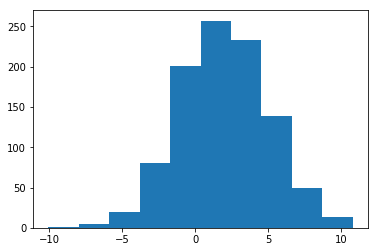

In [31]:
plt.hist(training_outputs.numpy())

In [32]:
def prediction(input, weight, bias):
    return input * weight + bias

In [33]:
def loss(weights, biases):
    error = prediction(training_inputs, weights, biases) - training_outputs
    return tf.reduce_mean(tf.square(error))

In [34]:
def grad(weights, biases):
    with tf.GradientTape() as tape:
        loss_value = loss(weights, biases)
    return tape.gradient(loss_value, [weights, biases])

bullshit init vals

In [35]:
train_steps = 200
learning_rate = 0.01
W = tfe.Variable(5.)
B = tfe.Variable(10.)

initial loss:

In [36]:
loss(W, B)

<tf.Tensor: id=1703, shape=(), dtype=float32, numpy=68.337906>

In [37]:
for i in range(train_steps):
    dW, dB = grad(W, B)
    W.assign_sub(dW * learning_rate)
    B.assign_sub(dB * learning_rate)
    if i % 20 == 0:
        print('loss at step {:03d}: {:.3f}'.format(i, loss(W, B)))

loss at step 000: 65.687
loss at step 020: 29.966
loss at step 040: 13.967
loss at step 060: 6.798
loss at step 080: 3.585
loss at step 100: 2.145
loss at step 120: 1.498
loss at step 140: 1.209
loss at step 160: 1.079
loss at step 180: 1.020


final loss:

In [38]:
loss(W, B)

<tf.Tensor: id=9006, shape=(), dtype=float32, numpy=0.99471706>

final W and B:

In [39]:
W, B

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0519025>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.152522>)

#### example: multi-layer mnist

In [40]:
batch = tf.zeros([1, 1, 784])
batch.shape

TensorShape([Dimension(1), Dimension(1), Dimension(784)])

In [41]:
result = model(batch)
result

<tf.Tensor: id=9097, shape=(1, 1, 10), dtype=float32, numpy=array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]], dtype=float32)>

##### just loading the data

In [42]:
def decode_image(image):
    image = tf.decode_raw(image, tf.uint8)
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    return image / 255.0

In [43]:
def decode_label(label):
    label = tf.decode_raw(label, tf.uint8)
    label = tf.reshape(label, [])
    return tf.to_int32(label)

In [44]:
def dataset(train_or_test):
    if train_or_test == 'train':
        prefix = 'train'
    elif train_or_test == 'test':
        prefix = 't10k'
    else:
        raise ValueError("only 'train' and 't10k' are supported for `train_or_test`")
    
    images_file = '/data/mnist_yl/{}-images-idx3-ubyte'.format(prefix)
    labels_file = '/data/mnist_yl/{}-labels-idx1-ubyte'.format(prefix)
    
    images = tf.data.FixedLengthRecordDataset(
        images_file, 28 * 28, header_bytes=16
    ).map(decode_image)
    labels = tf.data.FixedLengthRecordDataset(
        labels_file, 1, header_bytes=8
    ).map(decode_label)
    return tf.data.Dataset.zip((images, labels))

In [45]:
dataset_train = dataset('train') \
    .shuffle(60000) \
    .repeat(4) \
    .batch(32)

##### defining the model loss and gradient shit

In [46]:
def loss(model, x, y):
    prediction = model(x)
    return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=prediction)

In [47]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return tape.gradient(loss_value, model.variables)

In [48]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [49]:
x, y = iter(dataset_train).next()

initial loss:

In [50]:
loss(model, x, y)

<tf.Tensor: id=9173, shape=(), dtype=float32, numpy=2.4276183>

##### training loop

In [51]:
optimizer.apply_gradients?

In [52]:
for (i, (x, y)) in enumerate(dataset_train):
    grads = grad(model, x, y)
    optimizer.apply_gradients(
        grads_and_vars=zip(grads, model.variables),
        global_step=tf.train.get_or_create_global_step()
    )
    
    if i % 200 == 0:
        print('loss at step {:04d}: {:.3f}'.format(i, loss(model, x, y)))

loss at step 0000: 2.434
loss at step 0200: 2.046
loss at step 0400: 2.066
loss at step 0600: 1.840
loss at step 0800: 1.697
loss at step 1000: 1.667
loss at step 1200: 1.522
loss at step 1400: 1.564
loss at step 1600: 1.311
loss at step 1800: 1.188
loss at step 2000: 1.216
loss at step 2200: 0.919
loss at step 2400: 1.016
loss at step 2600: 1.155
loss at step 2800: 0.854
loss at step 3000: 1.081
loss at step 3200: 0.716
loss at step 3400: 0.669
loss at step 3600: 1.005
loss at step 3800: 0.506
loss at step 4000: 0.744
loss at step 4200: 0.706
loss at step 4400: 0.677
loss at step 4600: 0.656
loss at step 4800: 0.629
loss at step 5000: 0.621
loss at step 5200: 0.361
loss at step 5400: 0.618
loss at step 5600: 0.524
loss at step 5800: 0.419
loss at step 6000: 0.463
loss at step 6200: 0.454
loss at step 6400: 0.514
loss at step 6600: 0.421
loss at step 6800: 0.487
loss at step 7000: 0.550
loss at step 7200: 0.319
loss at step 7400: 0.395


final loss:

In [53]:
loss(model, x, y)

<tf.Tensor: id=663178, shape=(), dtype=float32, numpy=0.51715356>

##### on a gpu

*if* this is running in a gpu, you may un-comment and execute the following

In [54]:
# with tf.device('/gpu:0'):
#     for (i, (x, y)) in enumerate(dataset_train):
#         optimizer.minimize(
#             lambda: loss(model, x, y),
#             global_step=tf.train.get_or_create_global_step()
#         )

### variables and optimizers

I can't tell whether the purpose discussed here -- storing mutable tensors for access during automatic differentiation while models are training -- is the *sole* purpose or just *one good* purpose.

the docstring for `tf.Variable` is actually pretty useful

In [55]:
tf.Variable?

basically, variables are ways of maintaining state across different session runs. they can be passed around between different operations within sessions as well

the tutorial the presents a preferable alternative method of defining models for training. given the original linear regression model:

```python
NUM_EXAMPLES = 1000
training_inputs = tf.random_normal([NUM_EXAMPLES])
noise = tf.random_normal([NUM_EXAMPLES])
training_outputs = training_inputs * 3 + 2 + noise

def prediction(input, weight, bias):
  return input * weight + bias

def loss(weights, biases):
  error = prediction(training_inputs, weights, biases) - training_outputs
  return tf.reduce_mean(tf.square(error))

def grad(weights, biases):
  with tf.GradientTape() as tape:
    loss_value = loss(weights, biases)
  return tape.gradient(loss_value, [weights, biases])

train_steps = 200
learning_rate = 0.01

# Start with arbitrary values for W and B on the same batch of data
W = tfe.Variable(5.)
B = tfe.Variable(10.)

print("Initial loss: {:.3f}".format(loss(W, B)))

for i in range(train_steps):
  dW, dB = grad(W, B)
  W.assign_sub(dW * learning_rate)
  B.assign_sub(dB * learning_rate)
  if i % 20 == 0:
    print("Loss at step {:03d}: {:.3f}".format(i, loss(W, B)))

print("Final loss: {:.3f}".format(loss(W, B)))
print("W = {}, B = {}".format(W.numpy(), B.numpy()))
```

we update this with a oop approach in which:

1. the mutable weight and bias variables `W` and `B` are moved from geing global variables to model instance attributes
1. the predict function is changed from a global function taking input, weight, and bias to a model instance method taking just inputs (weights and biases being instance attributes)
1. the loss and gradient functions (which previously took weights and biases) are updated to take models, inputs, and targets (the assumption being that models have weights and biases
1. the optimization portion utilizes built-in optimizer and gradient methods rather than hard-coding the updates


things which remain the same:

1. the random sampling for initial inputs and outputs

In [56]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        # above we just created global variables W and B; here we save them as
        # model attributes
        self.W = tfe.Variable(5., name='weight')
        self.B = tfe.Variable(10., name='bias')
    
    def predict(self, inputs):
        return inputs * self.W + self.B

In [57]:
# A toy dataset of points around 3 * x + 2
NUM_EXAMPLES = 2000
training_inputs = tf.random_normal([NUM_EXAMPLES])
noise = tf.random_normal([NUM_EXAMPLES])
training_outputs = training_inputs * 3 + 2 + noise

In [58]:
def loss(model, inputs, targets):
    error = model.predict(inputs) - targets
    return tf.reduce_mean(tf.square(error))

def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return tape.gradient(loss_value, [model.W, model.B])

In [59]:
model = Model()
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

initial loss:

In [60]:
loss(model, training_inputs, training_outputs)

<tf.Tensor: id=663212, shape=(), dtype=float32, numpy=68.37149>

In [61]:
for i in range(300):
    grads = grad(model, training_inputs, training_outputs)
    optimizer.apply_gradients(
        zip(grads, [model.W, model.B]),
        global_step=tf.train.get_or_create_global_step()
    )
    
    if i % 20 == 0:
        print('loss at step {:03d}: {:.3f}'.format(i, loss(model, training_inputs, training_outputs)))

loss at step 000: 65.718
loss at step 020: 29.973
loss at step 040: 13.968
loss at step 060: 6.802
loss at step 080: 3.594
loss at step 100: 2.157
loss at step 120: 1.513
loss at step 140: 1.225
loss at step 160: 1.096
loss at step 180: 1.038
loss at step 200: 1.013
loss at step 220: 1.001
loss at step 240: 0.996
loss at step 260: 0.993
loss at step 280: 0.992


final loss:

In [62]:
loss(model, training_inputs, training_outputs)

<tf.Tensor: id=673558, shape=(), dtype=float32, numpy=0.9919324>

final weights and biases

In [63]:
model.W.numpy(), model.B.numpy()

(2.9956298, 2.0364199)

## use objects for state during eager execution

### variables are objects

one useful fact about eager execution: variables persist with their references. if references are removed the variables die. the example is

```python
with tf.device('gpu:0'):
    v = tfe.Variable(tf.random_normal([1000, 1000]))
    # do some shit -- v is taking up GPU memory
    # do some more shit
    # do even more shit -- v is still taking up GPU memory
    v = None
    # v is gone, no more GPU memory is being used
```

### object-based saving

any variable can be checkpointed using `tf.Checkpoint`. there is no discussion re: whether something other than a variable can be checkpointed or, for that matter, what exactly a variable is. again, check out the `tv.Variable` docstring

In [65]:
tf.Variable?

In [66]:
x = tfe.Variable(10.)
x

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=10.0>

In [68]:
checkpoint = tfe.Checkpoint(x_var_name=x)
checkpoint

In [69]:
x.assign(2.)
x

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>

In [70]:
save_path = checkpoint.save('/tmp/ckpt/')

In [71]:
x.assign(11.)

<tf.Variable '' shape=() dtype=float32, numpy=11.0>

In [72]:
checkpoint.restore(save_path)

In [73]:
x

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>

In [74]:
ll /tmp/ckpt

total 12
-rw-r--r-- 1 zlamberty 217 Jun 25 14:16 -1.data-00000-of-00001
-rw-r--r-- 1 zlamberty 256 Jun 25 14:16 -1.index
-rw-r--r-- 1 zlamberty  81 Jun 25 14:16 checkpoint


we just demonstrated how we would checkpoint single variables. we can also checkpoint more than that (whole models, e.g)

In [76]:
model = Model()
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)

In [79]:
import os

checkpoint_dir = '/tmp/tensorflow_tutorial_model'
if not os.path.isdir(checkpoint_dir):
    os.makedirs(checkpoint_dir)

In [80]:
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')

In [83]:
# the keys in the **kwargs passed to `tfe.Checkpoint` are arbitrary
# and become the name of the real rhs value within the checkpoint
# object
root = tfe.Checkpoint(
    optimizer=optimizer,
    model=model,
    optimizer_step=tf.train.get_or_create_global_step()
)

In [84]:
root.save(file_prefix=checkpoint_prefix)

'/tmp/tensorflow_tutorial_model/ckpt-1'

In [85]:
root.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [86]:
ll /tmp/tensorflow_tutorial_model/

total 12
-rw-r--r-- 1 zlamberty 131 Jun 25 15:05 checkpoint
-rw-r--r-- 1 zlamberty 410 Jun 25 15:05 ckpt-1.data-00000-of-00001
-rw-r--r-- 1 zlamberty 356 Jun 25 15:05 ckpt-1.index


### object-oriented metrics

metrics exist as objects that are callable, not as functions or values. update these metrics by passing arguments to the element via the `__call__` (i.e. `(...)`) method, and get actual results via teh `.result` method

In [87]:
m = tfe.metrics.Mean("loss")
m(0)
m(5)
m.result()

<tf.Tensor: id=673681, shape=(), dtype=float64, numpy=2.5>

In [88]:
m([8, 9])
m.result()

<tf.Tensor: id=673693, shape=(), dtype=float64, numpy=5.5>

#### summaries and tensorboard

we use the `tf.contrib.summary` function to record information in a way that is ingestible via `tensorboard`, a visualization tool (generally distributed with, but not as a part of, `tensorflow`)

In [90]:
tf.contrib.summary?

the documentation (both online and in the docstring) only offer pseudo-code examples of how to create or register summaries. to reproduce them:

##### summaries in eager execution

from the web tutorial:

```python
writer = tf.contrib.summary.create_file_writer(logdir)
global_step = tf.train.get_or_create_global_step()

writer.set_as_default()

for _ in range(num_iterations):
    global_step.assign_add(1)
    
    # some sort of `record_summaries` context is required 
    with tf.contrib.summary.record_summaries_every_n_global_steps(100):
        # model model model model...
        tf.contrib.summary.scalar('loss', loss)
```

from the docstrings:

```python
global_step = tf.train.get_or_create_global_step()
summary_writer = tf.contrib.summary.create_file_writer(
    train_dir,
    flush_millis=10000
)

with summary_writer.as_default(), tf.contrib.summary.always_record_summaries():
    # model code goes here
    # and in it call
    tf.contrib.summary.scalar("loss", my_loss)
    # In this case every call to tf.contrib.summary.scalar will generate a record
```

##### summaries in graph execution

from the docstrings:

```python
global_step = tf.train.get_or_create_global_step()
summary_writer = tf.contrib.summary.create_file_writer(
    train_dir,
    flush_millis=10000
)

with summary_writer.as_default(), tf.contrib.summary.always_record_summaries():
    # model definition code goes here
    # and in it call
    tf.contrib.summary.scalar("loss", my_loss)
    # *EVERYTHING UP TO HERE IS the same between eager and graph execution
    
    # In this case every call to tf.contrib.summary.scalar will generate an op,
    # note the need to run tf.contrib.summary.all_summary_ops() to make sure these
    # ops get executed.
    # ...
    train_op = ....

with tf.Session(...) as sess:
    tf.global_variables_initializer().run()
    tf.contrib.summary.initialize(graph=tf.get_default_graph())
    # ...
    while not_done_training:
        sess.run([train_op, tf.contrib.summary.all_summary_ops()])
        # ...
```

## advanced automatic differentiation topics

here we investiage the `tf.GradientTape` function in a bit more detail, and particularly applications to different types of models

### dynamic models

the example given here is a ["backtracking line search"](https://en.wikipedia.org/wiki/Backtracking_line_search), which is a minimization approach that seeks to find the distance along a search direction that you should jump to maximize some objective function (e.g. in gradient descent, given some extremely large initial jump size, "backtrack" until you find some acceptably small minimum)

In [93]:
tape.gradient?

In [223]:
def line_search_step(fn, init_x, rate=1.0):
    with tf.GradientTape() as tape:
        # to record a tensor you must call `tape.watch`
        tape.watch(init_x)
        
        # variables, on the other hand, are automatically recorded
        value = fn(init_x)
    
    grad, = tape.gradient(
        target=value,  # tensor we wish to differentiate
        sources=[init_x]  # the variables wrt which we differentiate
    )
    
    grad_norm = tf.reduce_sum(grad * grad) ** 0.5
    
    init_value = value
    print('init_x = {}'.format(init_x))
    print('init_grad = {}'.format(grad))
    print('init_grad_norm = {}'.format(grad_norm))
    print('init_value = {}'.format(value))
    print('init_rate = {}'.format(rate))
    while value > init_value - rate * grad_norm:
        x = init_x - rate * grad
        print()
        print('x = {} - {} * {} = {}'.format(init_x.numpy(), rate, grad, x))
        value = fn(x)
        rate /= 2.0
        print('x = {}'.format(x))
        print('grad = {}'.format(grad))
        print('grad_norm = {}'.format(grad_norm))
        print('value = {}'.format(value))
        print('rate = {}'.format(rate))
    
    return x, value

In [224]:
fn = lambda x: x * x

In [225]:
init_x = tfe.Variable(1000.)

In [226]:
rate = 1

In [227]:
line_search_step(fn, init_x, rate)

init_x = <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1000.0>
init_grad = 2000.0
init_grad_norm = 2000.0
init_value = 1000000.0
init_rate = 1

x = 1000.0 - 1 * 2000.0 = -1000.0
x = -1000.0
grad = 2000.0
grad_norm = 2000.0
value = 1000000.0
rate = 0.5

x = 1000.0 - 0.5 * 2000.0 = 0.0
x = 0.0
grad = 2000.0
grad_norm = 2000.0
value = 0.0
rate = 0.25


(<tf.Tensor: id=674899, shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: id=674904, shape=(), dtype=float32, numpy=0.0>)

why isn't the `grad` variable updated? it looks like it's defined in terms of the `init_x` value, in which case it is repeatedly being updated *to the same value* -- I think that's wrong

### additional function to compute gradients

it is possible that we don't want to use `tfe.Variables` (as in, only tensors and functions) when calculating gradients -- especially if have an exact version of a gradient (I expect this is a good deal faster than automatic gradient computation). the docs reference two functions:

1. `tfe.gradients_functions`: given a function, this returns a function which is the gradient of that input function
1. `tfe.value_and_gradients_functions`: same as above, but also returns the value of the input function at the invoked input (i.e. $f(x)$ and $f'(x)$)

In [229]:
def square(x):
    return tf.multiply(x, x)

In [232]:
grad = tfe.gradients_function(square)

In [233]:
square(3.)

<tf.Tensor: id=674922, shape=(), dtype=float32, numpy=9.0>

In [234]:
grad(3.)

[<tf.Tensor: id=674928, shape=(), dtype=float32, numpy=6.0>]

In [235]:
gradgrad = tfe.gradients_function(lambda x: grad(x)[0])
gradgrad(3.)

[<tf.Tensor: id=674940, shape=(), dtype=float32, numpy=2.0>]

In [236]:
gradgradgrad = tfe.gradients_function(lambda x: gradgrad(x)[0])
gradgradgrad(3.)

[None]

note this will also work with discontinuities (how?)

In [237]:
def myabs(x):
    return x if x > 0. else -x

In [238]:
grad = tfe.gradients_function(myabs)

In [239]:
grad(3.)

[<tf.Tensor: id=310, shape=(), dtype=float32, numpy=1.0>]

In [240]:
grad(-3.)

[<tf.Tensor: id=674965, shape=(), dtype=float32, numpy=-1.0>]

In [242]:
grad(0)

[<tf.Tensor: id=674979, shape=(), dtype=int32, numpy=-1>]

### custom gradients

the claim here is that sometimes you need to override the basic gradient calculation method (specifically, it seems, to prevent against explosion or asymptoting). in particular, this is how you can provide optimized calculations (e.g. re-use of inputs in the derivative itself, common any time we'll be using exponentials e.g.). they provide the following examples:

In [259]:
@tf.custom_gradient
def clip_gradient_by_norm(x, norm):
    y = tf.identity(x)
    def grad_fn(dresult):
        return [tf.clip_by_norm(dresult, norm), None]
    return y, grad_fn

and here, showing how clipping actually makes a difference:

In [260]:
def log1pexp(x):
    return tf.log(1 + tf.exp(x))

In [261]:
grad_log1pexp = tfe.gradients_function(log1pexp)

In [262]:
grad_log1pexp(0.)

[<tf.Tensor: id=675016, shape=(), dtype=float32, numpy=0.5>]

and for `x=100` we get a grad of `nan` (overflow)

In [263]:
grad_log1pexp(100.)

[<tf.Tensor: id=675024, shape=(), dtype=float32, numpy=nan>]

In [264]:
tf.exp(100.)

<tf.Tensor: id=675026, shape=(), dtype=float32, numpy=inf>

we can create a custom gradient 

In [265]:
tf.custom_gradient?

as the docstring above makes clear, this decorator allows you to define a function which has a custom default behavior. you define the function itself and its gradient, and then calls to `tfe.gradient_function` will return your custom gradient instead of the built-in gradient

In [266]:
@tf.custom_gradient
def log1pexp(x):
    # calculate the exponential of x as a separate tensor
    # this can be re-used in both the funciton and its derivative
    e = tf.exp(x)
    
    # the function value is tf.log(1 + e) and will be defined
    # inline below
    
    # the derivative, on the other hand, must be defined here as 
    # a function of input grad_ys values
    def grad(dy):
        # the easiest version would be (e / (1 + e)) but I bet that's 
        # computationally less desirable than this version
        return dy * (1 - 1 / (1 + e))
    
    return tf.log(1 + e), grad

after defining the above, the function `tfe.gradients_function` will point to our custom gradient function defined above rather than the default calculated gradient function. at the current time I can't figure out how to demonstrate this, unfortunately

In [280]:
grad_log1pexp = tfe.gradients_function(log1pexp)

In [286]:
grad_log1pexp(0.)

[<tf.Tensor: id=675036, shape=(), dtype=float32, numpy=0.5>]

and for `x=100` we get the expected value (1) and no overflow

In [287]:
grad_log1pexp(100.)

[<tf.Tensor: id=675046, shape=(), dtype=float32, numpy=1.0>]

## performance

according to the docs, **all** computation in eager execution mode is done on the gpu if available. it looks like the docker container is taking care of this for me successfully!

we can control this more granularly with teh `tf.device` context manager.

here's their example

In [290]:
import time

def measure(x, steps):
    # TensorFlow initializes a GPU the first time it's used, exclude from timing.
    tf.matmul(x, x)
    start = time.time()
    for i in range(steps):
        x = tf.matmul(x, x)
        _ = x.numpy()  # Make sure to execute op and not just enqueue it
    end = time.time()
    return end - start

shape = (1000, 1000)
steps = 200
print("Time to multiply a {} matrix by itself {} times:".format(shape, steps))

# Run on CPU:
with tf.device("/cpu:0"):
    print("CPU: {} secs".format(measure(tf.random_normal(shape), steps)))

# Run on GPU, if available:
if tfe.num_gpus() > 0:
    with tf.device("/gpu:0"):
        print("GPU: {} secs".format(measure(tf.random_normal(shape), steps)))
else:
    print("GPU: not found")

Time to multiply a (1000, 1000) matrix by itself 200 times:
CPU: 1.4114584922790527 secs
GPU: not found


they also mention that you can create distributed copies of the same tensor on different devices, which is cool:

```python
x = tf.random_normal([10, 10])

x_gpu0 = x.gpu()
x_cpu = x.cpu()

_ = tf.matmul(x_cpu, x_cpu)
_ = tf.matmul(x_gpu, x_gpu)

if tfe.num_gpus() > 1:
    x_gpu1 = x.gpu(1)
    _ = tf.matmul(x_gpu1, x_gpu1)
```

reproduced below for users on a gpu machine (uncomment)

In [291]:
# x = tf.random_normal([10, 10])

# x_gpu0 = x.gpu()
# x_cpu = x.cpu()

# _ = tf.matmul(x_cpu, x_cpu)    # Runs on CPU
# _ = tf.matmul(x_gpu0, x_gpu0)  # Runs on GPU:0

# if tfe.num_gpus() > 1:
#     x_gpu1 = x.gpu(1)
#     _ = tf.matmul(x_gpu1, x_gpu1)  # Runs on GPU:1

### benchmarks

toss-off statement about how eager execution is comparable to graph execution in terms of performance fro "compute-heavy" models (e.g. is ResNet50). the more the burden shifts from computation to optimization and code-path calculation, the worse eager execution looks.

## work with graphs

the want you to use the graph execution paradigm, folks, they list the advantages of the graph execution method and it basically boils down to compilation into `c++` base code and distribution / replication handling

### write compatible code

they offer some tips for how to write eager-execution-able code that is *also* graph executible

1. use `tf.data` for inputs instead of queues (I'm not sure what a queue is, nor how we used them here)
1. use OOP api in `tf.keras` (`layers` and `Model`)
    1. explained reason: they have "explicit storage for variables"
    
they suggest you develop / iterate in eager execution mode and then checkpoint / import into graph execution for model deployment. this is interesting as an idea

### use eager exectuion in a graph environment

they show how you can selectively use eager execution from within graph execution (which is super useful to know!)

```python
def my_py_func(x):
    x = tf.matmul(x, x)
    print(x)
    return x

with tf.Session() as sess:
    x = tf.placeholder(dtype=tf.float32)
    
    # eager function from within graph execution right here
    pf = tfe.py_func(my_py_func, [x], tf.float32)
    
    sess.run(pf, feed_dict={x: [[2.0]]})
```

# summary

okay, there was a ton of info covered here. the basic gist is that there are two modes of execution in tensorflow

1. **graph execution**: you define a computation graph and then, after the entire graph has been well defined, you ask tensorflow to initiate a session and perform the computation
1. **eager execution**: a more `python`ic interactive method of developing code in the interpreter (and getting real-time updated to your commands

this document focuses on *eager* execution. we cover the following topics

1. one and only one time in a given `python` session you may run `tf.enable_eager_execution()`
    1. this cannot be undone. you must kill the session
1. you can write all tensorflow code as if you were writing regular `python` code
    1. e.g. control flow with `if... else`, `print` statements, live evaluation of arithmetic operations
1. you can more easily identify the results of training a model under this paradigm (that is, define models and immediately train them against observable, interactable data)
1. there are standard ways of calculating gradients
1. there are some differentiation tricks
    1. this did not seem to have anything in particular to do with eager execution tbh)